<a href="https://colab.research.google.com/github/jugalshirodkar/AIML/blob/main/MLPXOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [1000/10000], Loss: 0.2494
Epoch [2000/10000], Loss: 0.2486
Epoch [3000/10000], Loss: 0.2464
Epoch [4000/10000], Loss: 0.2385
Epoch [5000/10000], Loss: 0.2122
Epoch [6000/10000], Loss: 0.1462
Epoch [7000/10000], Loss: 0.0612
Epoch [8000/10000], Loss: 0.0270
Epoch [9000/10000], Loss: 0.0154
Epoch [10000/10000], Loss: 0.0102


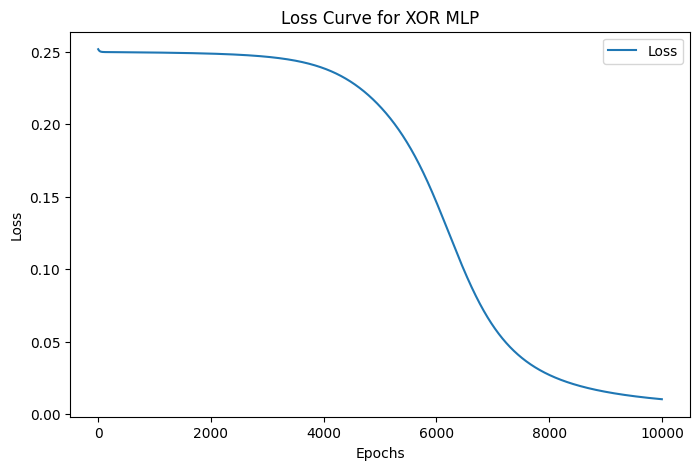


Test Results (Predictions):
tensor([[0.1114],
        [0.8998],
        [0.8997],
        [0.0918]])


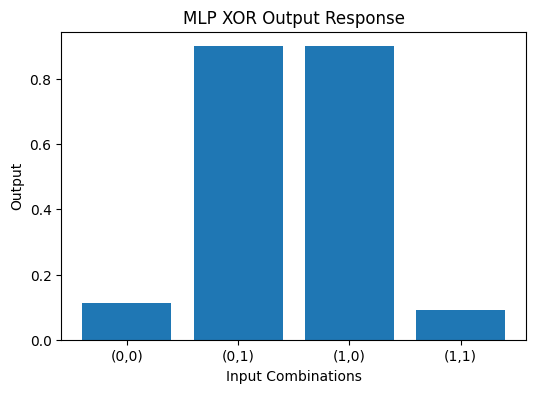

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# XOR inputs and outputs
inputs = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define the MLP model
class MLP_XOR(nn.Module):
    def __init__(self):
        super(MLP_XOR, self).__init__()
        self.hidden = nn.Linear(2, 4)  # 2 input features, 4 neurons in hidden layer
        self.output = nn.Linear(4, 1)  # 4 hidden neurons, 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation function for hidden layer
        x = torch.sigmoid(self.output(x))  # Activation function for output layer
        return x

# Initialize model, loss function and optimizer
model = MLP_XOR()
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Variables to store loss values for plotting
losses = []

# Training the model
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, targets)  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

    # Store loss for every epoch for plotting
    losses.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting the loss curve
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for XOR MLP')
plt.legend()
plt.show()

# Testing the trained model and plot the response
with torch.no_grad():
    test_outputs = model(inputs)
    print("\nTest Results (Predictions):")
    print(test_outputs)

# Plotting the output response of the XOR model
plt.figure(figsize=(6, 4))
plt.bar(['(0,0)', '(0,1)', '(1,0)', '(1,1)'], test_outputs.flatten().numpy())
plt.xlabel('Input Combinations')
plt.ylabel('Output')
plt.title('MLP XOR Output Response')
plt.show()


Epoch [1000/10000], Loss: 0.2500
Epoch [2000/10000], Loss: 0.2500
Epoch [3000/10000], Loss: 0.2500
Epoch [4000/10000], Loss: 0.2500
Epoch [5000/10000], Loss: 0.2500
Epoch [6000/10000], Loss: 0.2499
Epoch [7000/10000], Loss: 0.2499
Epoch [8000/10000], Loss: 0.2499
Epoch [9000/10000], Loss: 0.2499
Epoch [10000/10000], Loss: 0.2498


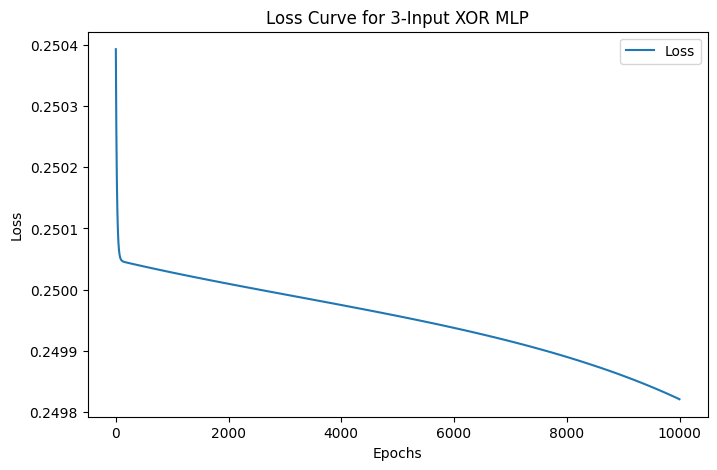


Test Results (Predictions):
tensor([[0.4931],
        [0.4947],
        [0.5046],
        [0.5054],
        [0.4939],
        [0.4961],
        [0.5046],
        [0.5077]])


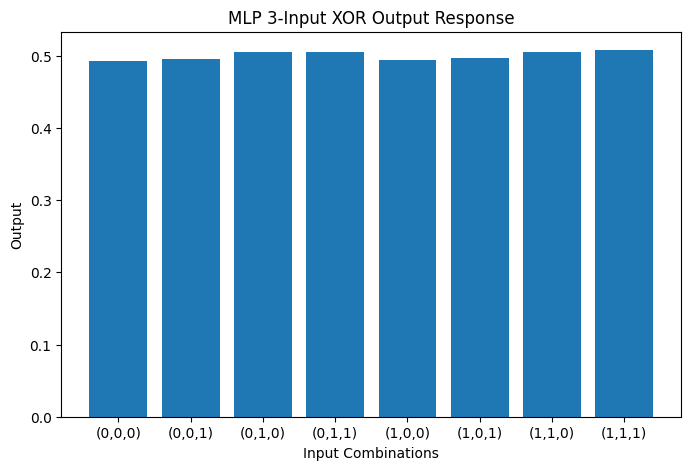

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# XOR inputs and outputs for 3-input XOR
inputs = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                       [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float32)
targets = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float32)

# Define the MLP model
class MLP_XOR(nn.Module):
    def __init__(self):
        super(MLP_XOR, self).__init__()
        self.hidden = nn.Linear(3, 4)  # 3 input features, 4 neurons in hidden layer
        self.output = nn.Linear(4, 1)  # 4 hidden neurons, 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Activation function for hidden layer
        x = torch.sigmoid(self.output(x))  # Activation function for output layer
        return x

# Initialize model, loss function and optimizer
model = MLP_XOR()
criterion = nn.MSELoss()  # Mean squared error loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Variables to store loss values for plotting
losses = []

# Training the model
epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs, targets)  # Calculate the loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the weights

    # Store loss for every epoch for plotting
    losses.append(loss.item())

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Plotting the loss curve
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve for 3-Input XOR MLP')
plt.legend()
plt.show()

# Testing the trained model and plot the response
with torch.no_grad():
    test_outputs = model(inputs)
    print("\nTest Results (Predictions):")
    print(test_outputs)

# Plotting the output response of the XOR model
input_labels = ['(0,0,0)', '(0,0,1)', '(0,1,0)', '(0,1,1)', '(1,0,0)', '(1,0,1)', '(1,1,0)', '(1,1,1)']
plt.figure(figsize=(8, 5))
plt.bar(input_labels, test_outputs.flatten().numpy())
plt.xlabel('Input Combinations')
plt.ylabel('Output')
plt.title('MLP 3-Input XOR Output Response')
plt.show()
